<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap15/Load_Data_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd '/content/gdrive/My Drive/school_of_ai/chap15/'

/content/gdrive/My Drive/school_of_ai/chap15


In [0]:
from torch.utils.data import Dataset, random_split
from PIL import Image
import numpy as np
import torch
import os
import torchvision.transforms as transforms
from tqdm import notebook

In [0]:
class RawDataSet(Dataset):
    def __init__(self,url):
        self.fg = []
        self.mask = []
        self.url = url
        self.bg = []

        for file_name in os.listdir(url+'Background/'):
            bg = Image.open(url+'Background/'+ file_name)
            bg_npimg = np.asarray(bg)
            
            if(len(bg_npimg.shape) ==2):  
               bg_npimg = np.repeat(bg_npimg[:, :, np.newaxis], 3, axis=2)
            self.bg.append(bg_npimg)  

        for file_name in os.listdir(url+'Foreground/'):
            fg = Image.open(url+'Foreground/'+ file_name)
            fg_npimg = np.asarray(fg)
            
            if(len(fg_npimg.shape) ==2):  
               fg_npimg = np.repeat(fg_npimg[:, :, np.newaxis], 3, axis=
            self.fg.append(fg_npimg) 

        for file_name in os.listdir(url+'Fg-Mask/'):
            mask = Image.open(url+'Fg-Mask/'+ file_name)
            mask_npimg = np.asarray(mask)
            
            if(len(fg_npimg.shape) ==2):  
               mask_npimg = np.repeat(mask_npimg[:, :, np.newaxis], 3, axis=2)
            self.mask.append(mask_npimg)   
            
    def __len__(self):
        return len(self.fg)

    def __getitem__(self, idx):
        bg = self.bg[idx]
        fg = self.fg[idx]
        mask = self.mask[idx]
        return bg,fg,mask

In [6]:
  raw_folder = '/content/gdrive/My Drive/school_of_ai/archive/'
  raw_dataset = RawDataSet(raw_folder)
  print(len(raw_dataset))
  raw_dataloaders = torch.utils.data.DataLoader(raw_dataset)
  raw_dataiter = iter(raw_dataloaders)
  bg_images,fg_images,mask_images = raw_dataiter.next()
  bg_images = bg_images.numpy()
  fg_images = fg_images.numpy()
  mask_images = mask_images.numpy()
  print(bg_images.shape)
  print(fg_images.shape)
  print(mask_images.shape)

100
(1, 224, 224, 3)
(1, 90, 33, 4)
(1, 120, 45, 3)


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
import zipfile
import os.path
for i in range(5):
  if(os.path.isfile(f'/content/gdrive/My Drive/school_of_ai/archive/data_part{str(i+1)}.zip')):
    print(f'Extract from data_part{str(i+1)}.zip to folder data_{str(i+1)}')
    archive = zipfile.ZipFile(f'/content/gdrive/My Drive/school_of_ai/archive/data_part{str(i+1)}.zip')
    for file in archive.namelist():
        archive.extract(file, '/content/')

In [0]:
class InputDataSet(Dataset):
    def __init__(self,url):
        self.fg_bg = []
        self.fg_bg_mask = []
        self.depth = []
        self.url = url

        for file_name in os.listdir(url+'Fg-Bg/'):
            fg_bg = Image.open(url+'Fg-Bg/'+ file_name)
            fg_bg_npimg = np.asarray(bg)
            
            if(len(fg_bg_npimg.shape) ==2):  
               fg_bg_npimg = np.repeat(fg_bg_npimg[:, :, np.newaxis], 3, axis=2)
            self.fg_bg.append(fg_bg_npimg)  

        for file_name in os.listdir(url+'Fg-Bg-Mask/'):
            fg_bg_mask = Image.open(url+'Fg-Bg-Mask/'+ file_name)
            fg_bg_mask_npimg = np.asarray(fg_bg_mask)
            
            if(len(fg_bg_mask_npimg.shape) ==2):  
               fg_bg_mask_npimg = np.repeat(fg_bg_mask_npimg[:, :, np.newaxis], 3, axis=2)
            self.fg_bg_mask.append(fg_bg_mask_npimg) 

        for file_name in os.listdir(url+'Depth/'):
            depth = Image.open(url+'Depth/'+ file_name)
            depth_npimg = np.asarray(depth)
            
            if(len(depth_npimg.shape) ==2):  
               depth_npimg = np.repeat(depth_npimg[:, :, np.newaxis], 3, axis=2)
            self.depth.append(depth_npimg)   
            
    def __len__(self):
        return len(self.depth_npimg)

    def __getitem__(self, idx):
        fg_bg = self.fg_bg[idx]
        fg_bg_mask = self.fg_bg_mask[idx]
        depth = self.depth[idx]
        return fg_bg,fg_bg_mask,depth

In [0]:
data1_folder = '/content/data_1/'
data2_folder = '/content/data_2/'
data3_folder = '/content/data_3/'
data4_folder = '/content/data_4/'
data5_folder = '/content/data_5/'

input_dataset = InputDataSet(input_folder)
print(len(input_dataset))
input_dataloaders = torch.utils.data.DataLoader(input_dataset)
input_dataiter = iter(input_dataloaders)
fg_bg_images,fg_bg_mask_images,depth_images = input_dataiter.next()
fg_bg_images = fg_bg_images.numpy()
fg_bg_mask_images = fg_bg_mask_images.numpy()
depth_images = depth_images.numpy()
print(fg_bg_images.shape)
print(fg_bg_mask_images.shape)
print(depth_images.shape)

In [0]:
ls   /content/data_1/Fg-Bg | wc -l
!ls  /content/data_1/Fg-Bg-Mask | wc -l
!ls  /content/data_1/Depth | wc -l
!ls   /content/data_2/Fg-Bg | wc -l
!ls   /content/data_2/Fg-Bg-Mask | wc -l
!ls   /content/data_2/Depth | wc -l
!ls   /content/data_3/Fg-Bg | wc -l
!ls   /content/data_3/Fg-Bg-Mask | wc -l
!ls   /content/data_3/Depth | wc -l
!ls   /content/data_4/Fg-Bg | wc -l
!ls   /content/data_4/Fg-Bg-Mask | wc -l
!ls   /content/data_4/Depth | wc -l
!ls   /content/data_5/Fg-Bg | wc -l
!ls   /content/data_5/Fg-Bg-Mask | wc -l
!ls   /content/data_5/Depth | wc -l

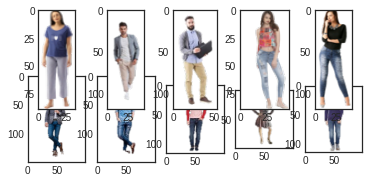

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
folder = '/content/gdrive/My Drive/school_of_ai/school_of_ai/archive/'
fig = plt.figure()
img1 = mpimg.imread(folder+'Foreground/fg61.png')
a = fig.add_subplot(1,5,1)
imgplot = plt.imshow(img1)
img2 = mpimg.imread(folder+'Foreground/fg62.png')
a = fig.add_subplot(1,5,2)
imgplot = plt.imshow(img2)
img3 = mpimg.imread(folder+'Foreground/fg63.png')
a = fig.add_subplot(1,5,3)
imgplot = plt.imshow(img3)
img4 = mpimg.imread(folder+'Foreground/fg64.png')
a = fig.add_subplot(1,5,4)
imgplot = plt.imshow(img4)
img5 = mpimg.imread(folder+'Foreground/fg65.png')
a = fig.add_subplot(1,5,5)
imgplot = plt.imshow(img5)
img4 = mpimg.imread(folder+'Foreground/fg66.png')
a = fig.add_subplot(2,5,1)
imgplot = plt.imshow(img4)
img5 = mpimg.imread(folder+'Foreground/fg67.png')
a = fig.add_subplot(2,5,2)
imgplot = plt.imshow(img5)
img5 = mpimg.imread(folder+'Foreground/fg68.png')
a = fig.add_subplot(2,5,3)
imgplot = plt.imshow(img5)
img4 = mpimg.imread(folder+'Foreground/fg69.png')
a = fig.add_subplot(2,5,4)
imgplot = plt.imshow(img4)
img5 = mpimg.imread(folder+'Foreground/fg70.png')
a = fig.add_subplot(2,5,5)
imgplot = plt.imshow(img5)